In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('winequality-red.csv')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<h2>Histograms</h2>

Text(0.5, 1.0, 'Histogram for fixed acidity')

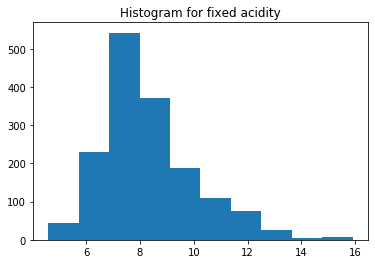

In [5]:
plt.hist(data['fixed acidity'])
plt.title('Histogram for fixed acidity')

Text(0.5, 1.0, 'Histogram for volatile acidity')

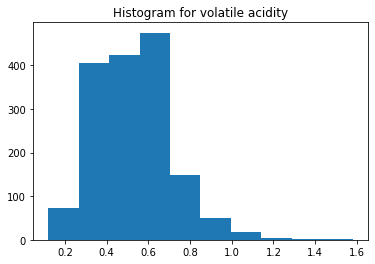

In [6]:
plt.hist(data['volatile acidity'])
plt.title('Histogram for volatile acidity')

Text(0.5, 1.0, 'Histogram for citric acid')

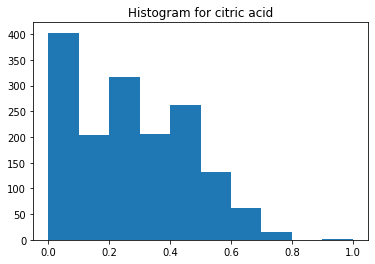

In [7]:
plt.hist(data['citric acid'])
plt.title('Histogram for citric acid')

Text(0.5, 1.0, 'Histogram for total sulfur dioxide')

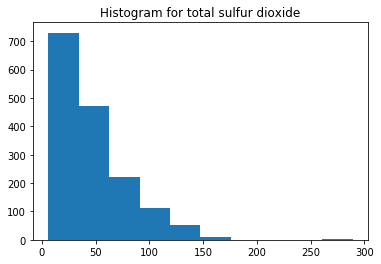

In [8]:
plt.hist(data['total sulfur dioxide'])
plt.title('Histogram for total sulfur dioxide')

Text(0.5, 1.0, 'Histogram for density')

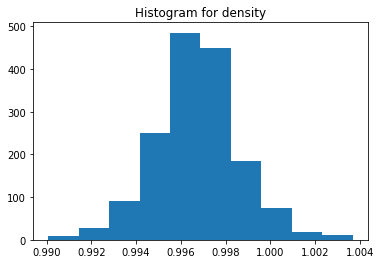

In [9]:
plt.hist(data['density'])
plt.title('Histogram for density')

Text(0.5, 1.0, 'Histogram for pH values')

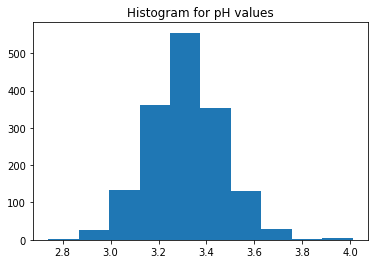

In [10]:
plt.hist(data['pH'])
plt.title('Histogram for pH values')

<h2>Box Plots</h2>

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Text(0.5, 1.0, 'Boxplot distribution for residual sugar')

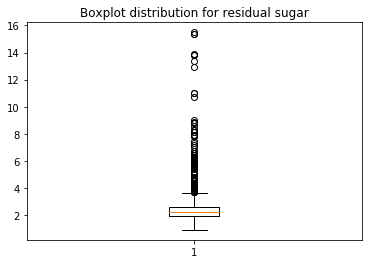

In [12]:
plt.boxplot(data['residual sugar'])
plt.title('Boxplot distribution for residual sugar')

Text(0.5, 1.0, 'Boxplot distribution for chlorides')

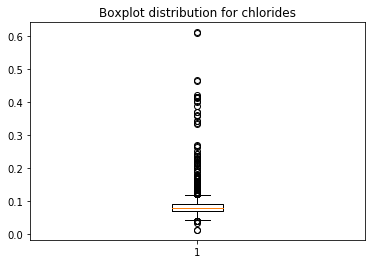

In [13]:
plt.boxplot(data['chlorides'])
plt.title('Boxplot distribution for chlorides')

Text(0.5, 1.0, 'Boxplot distribution for sulphates')

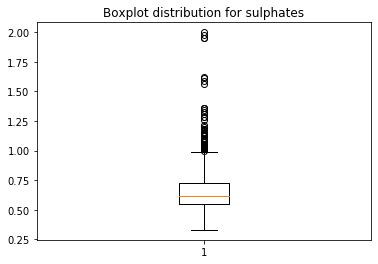

In [14]:
plt.boxplot(data['sulphates'])
plt.title('Boxplot distribution for sulphates')

Text(0.5, 1.0, 'Boxplot distribution for alcohol')

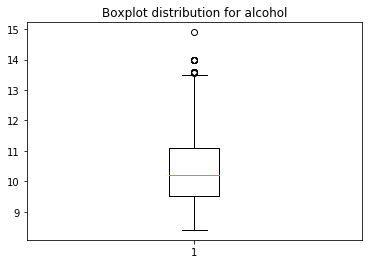

In [15]:
plt.boxplot(data['alcohol'])
plt.title('Boxplot distribution for alcohol')

Text(0.5, 1.0, 'Boxplot distribution for pH')

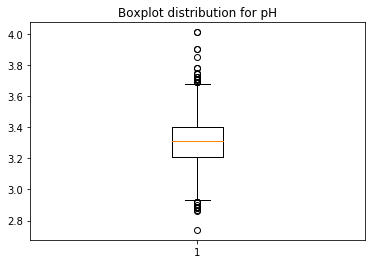

In [16]:
plt.boxplot(data['pH'])
plt.title('Boxplot distribution for pH')

<h2>Modelling</h2>

In [17]:
X=data.drop('quality',axis=1)
y=data['quality']

<h2>Split data set</h2>

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

<h2>Using KNN</h2>

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knc=KNeighborsClassifier(n_neighbors=15)


In [22]:
knc.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [23]:
pred_knc=knc.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
print(accuracy_score(y_test,pred_knc))

0.5416666666666666


<h4>Accuracy is about 54.16 percent using KNN with k=15</h4>

<h2>using Logistic regression</h2>

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logis=LogisticRegression()

In [28]:
logis.fit(X_train,y_train)

C:\Users\paras\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
pred_logis=logis.predict(X_test)

In [30]:
print(accuracy_score(y_test,pred_logis))

0.6229166666666667


<h4>Accuracy is about 62.29 percent using Logistic Regression</h4>